Spotify 'StreamingHistory0' data from May 9th, 2022 - October 14th, 2022

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as date

Import Excel data

In [13]:
df = pd.read_excel(r'C:\Users\duprase\Downloads\Spotify\StreamingHistory1.json.xlsx')
df

#df = pd.read_excel("StreamingHistory1.json.xlsx")
#df

,endTime,date,Wkday,time,artistName,trackName,msPlayed,minPlayed,Include Song
0,2022-05-09 19:38,2022-05-09,Mon\n,19:38,Punnany Massif,Élvezd,7381,0.123017,No\n
1,2022-08-17 13:01,2022-08-17,Wed,13:01,DJ Khaled,STAYING ALIVE (feat. Drake & Lil Baby),178176,2.969600,Yes\n
2,2022-08-17 13:05,2022-08-17,Wed,13:05,NAV,Never Sleep (with Lil Baby feat. Travis Scott),185785,3.096417,Yes\n
3,2022-08-17 13:06,2022-08-17,Wed,13:06,Nardo Wick,Dah Dah DahDah,20224,0.337067,No\n
4,2022-08-17 13:06,2022-08-17,Wed,13:06,DaBaby,WAITRESS,56876,0.947933,No\n
...,...,...,...,...,...,...,...,...,...
347,2022-10-14 23:45,2022-10-14,Fri,23:45,Pharrell Williams,Just a Cloud Away,176078,2.934633,Yes\n
348,2022-10-14 23:48,2022-10-14,Fri,23:48,Camila Cabello,Don't Go Yet,164842,2.747367,Yes\n
349,2022-10-14 23:51,2022-10-14,Fri,23:51,Sigala,Lullaby,204022,3.400367,Yes\n
350,2022-10-14 23:55,2022-10-14,Fri,23:55,BTS,Dynamite,199053,3.317550,Yes\n


In [14]:
df.shape

(352, 9)

In [15]:
def load_data(file):
    return pd.read_excel(file, may = ",", index_col = False, header=0)

In [16]:
#df = pd.read_excel("StreamingHistory1.json.xlsx")
#df

In [17]:
skippedsongs = df[ df['Include Song'] == "No"].index
df.drop(skippedsongs, inplace = True)

In [18]:
df

,endTime,date,Wkday,time,artistName,trackName,msPlayed,minPlayed,Include Song
0,2022-05-09 19:38,2022-05-09,Mon\n,19:38,Punnany Massif,Élvezd,7381,0.123017,No\n
1,2022-08-17 13:01,2022-08-17,Wed,13:01,DJ Khaled,STAYING ALIVE (feat. Drake & Lil Baby),178176,2.969600,Yes\n
2,2022-08-17 13:05,2022-08-17,Wed,13:05,NAV,Never Sleep (with Lil Baby feat. Travis Scott),185785,3.096417,Yes\n
3,2022-08-17 13:06,2022-08-17,Wed,13:06,Nardo Wick,Dah Dah DahDah,20224,0.337067,No\n
4,2022-08-17 13:06,2022-08-17,Wed,13:06,DaBaby,WAITRESS,56876,0.947933,No\n
...,...,...,...,...,...,...,...,...,...
347,2022-10-14 23:45,2022-10-14,Fri,23:45,Pharrell Williams,Just a Cloud Away,176078,2.934633,Yes\n
348,2022-10-14 23:48,2022-10-14,Fri,23:48,Camila Cabello,Don't Go Yet,164842,2.747367,Yes\n
349,2022-10-14 23:51,2022-10-14,Fri,23:51,Sigala,Lullaby,204022,3.400367,Yes\n
350,2022-10-14 23:55,2022-10-14,Fri,23:55,BTS,Dynamite,199053,3.317550,Yes\n


In [19]:
df.count()

endTime         352
date            352
Wkday           352
time            352
artistName      352
trackName       352
msPlayed        352
minPlayed       352
Include Song    352
dtype: int64

In [20]:
print(df.shape)

(352, 9)


Goal: What day of the week are songs streamed most?

In [21]:
df[['date','Wkday', 'minPlayed']]

,date,Wkday,minPlayed
0,2022-05-09,Mon\n,0.123017
1,2022-08-17,Wed,2.969600
2,2022-08-17,Wed,3.096417
3,2022-08-17,Wed,0.337067
4,2022-08-17,Wed,0.947933
...,...,...,...
347,2022-10-14,Fri,2.934633
348,2022-10-14,Fri,2.747367
349,2022-10-14,Fri,3.400367
350,2022-10-14,Fri,3.317550


In [22]:
day = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [23]:
mins=df.groupby('Wkday')['minPlayed'].sum().reindex(day)
mins

Wkday
Mon           NaN
Tue           NaN
Wed    118.914567
Thu           NaN
Fri    140.999283
Sat      3.569250
Sun           NaN
Name: minPlayed, dtype: float64

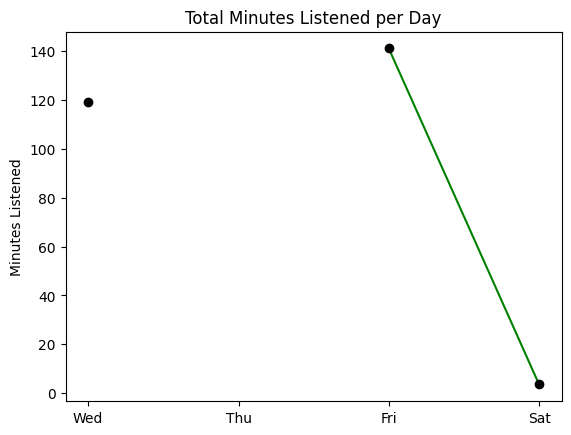

In [27]:
min_day = df.groupby('Wkday')['minPlayed'].sum().reindex(day)
plt.plot(min_day, color='Green', marker="o", mfc='black', mec= "k")
plt.ylabel('Minutes Listened')
plt.title('Total Minutes Listened per Day')
plt.show()

I need to correct information above music was listened to on other days. I need to review the way way data was imported to see why I am getting incorrect visualizations.

Goal: Top 10 Streamed Songs

In [28]:
pd.value_counts(df['trackName'])

Walk                                     12
Shoot It Myself (feat. Future)           10
I’m So Awesome                           10
9 Lives (feat. Polo G & NLE Choppa)       9
Heyy                                      7
                                         ..
Dead Shot (with Lil Uzi Vert)             1
Numb                                      1
Quevedo: Bzrp Music Sessions, Vol. 52     1
Bad Habit                                 1
7 Years                                   1
Name: trackName, Length: 183, dtype: int64

In [30]:
df.value_counts(df['trackName']).head(10)

trackName
Walk                                              12
I’m So Awesome                                    10
Shoot It Myself (feat. Future)                    10
9 Lives (feat. Polo G & NLE Choppa)                9
Heyy                                               7
Blow                                               6
WAITRESS                                           6
Backstage Passes (feat. Jack Harlow)               6
To The Bone (feat. YoungBoy Never Broke Again)     6
B.R.O. (Better Ride Out) [feat. Roddy Ricch]       6
dtype: int64

Bar graph Help:https://dfrieds.com/data-visualizations/bar-plot-python-pandas.html

Text(0.5, 0, 'Songs')

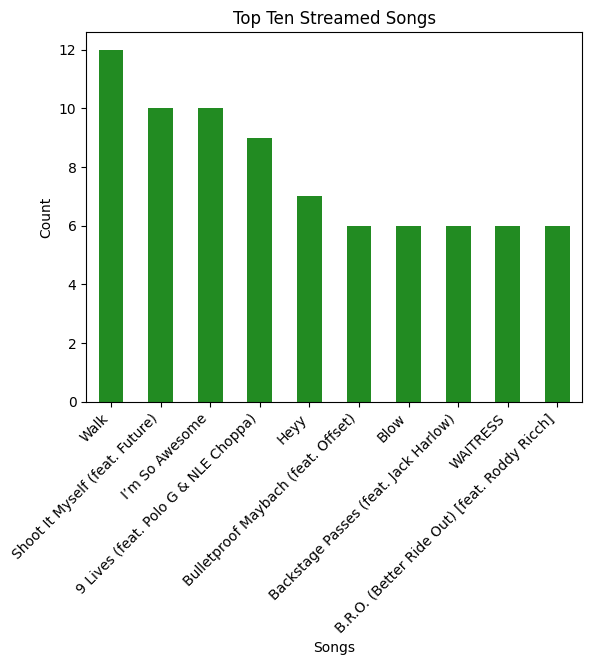

In [32]:
pd.value_counts(df['trackName']).head(10).plot(kind='bar', color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Top Ten Streamed Songs')
plt.ylabel('Count')
plt.xlabel('Songs')

Goal: Top 20 Streamed Artists

In [33]:
pd.value_counts(df['artistName'])

Kodak Black     24
Quavo           20
EST Gee         16
Lil Baby        15
DDG             15
                ..
Joji             1
JVKE             1
Oxlade           1
d4vd             1
Lukas Graham     1
Name: artistName, Length: 127, dtype: int64

In [34]:
pd.value_counts(df['artistName']).head(20)

Kodak Black               24
Quavo                     20
EST Gee                   16
Lil Baby                  15
DDG                       15
Harry Styles               7
Moneybagg Yo               7
Roddy Ricch                6
NAV                        6
DaBaby                     6
A Boogie Wit da Hoodie     6
Camila Cabello             5
George Ezra                5
G Herbo                    5
Drake                      5
DJ Khaled                  5
Pharrell Williams          4
Gucci Mane                 4
Offset                     4
Sigala                     4
Name: artistName, dtype: int64

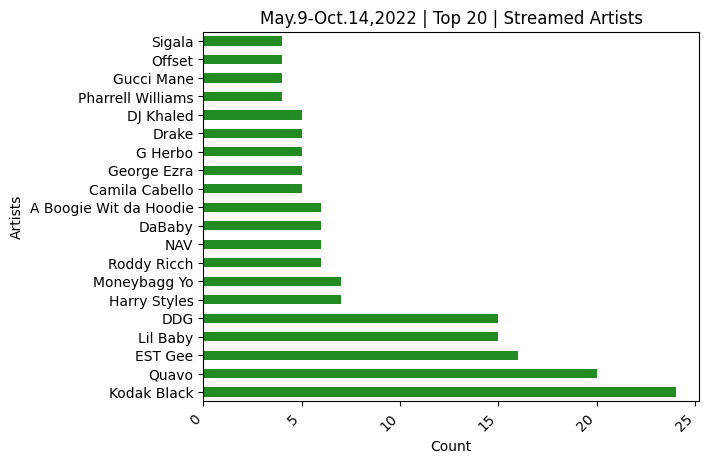

In [38]:
pd.value_counts(df['artistName']).head(20).plot(kind='barh', color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title('May.9-Oct.14,2022 | Top 20 | Streamed Artists')
plt.ylabel('Artists')
plt.xlabel('Count')
figsize=(100,100)

In [ ]:
I dont have play lists 